# 📊 Laboratorio 8 - Visualización de Datos
## <font size=4> *CC3084 - Data Science*, 2024 </font>
## <font size=3 color='gray'> Samuel Chamale y Adrian Rodriguez</font>

<div class="alert alert-block alert-warning">
<b>Nota:</b> Al utilizar visualizaciones dinámicas con Plotly, la previsualización no es posible. Es por eso que decidimos incluir imagenes de los resultados para evitar al calificador la ejecución del notebook.
</div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## 1. Emisiones Históricas de CO₂ 🌍

### a) Exploración de los Datos 📈

Comenzamos cargando y explorando el conjunto de datos historical_emissions.csv, que contiene las emisiones históricas de CO₂ a nivel mundial desde 1990 hasta 2018.

In [32]:
# Cargar los datos
emissions_df = pd.read_csv('data/emissions/historical_emissions.csv')

# Mostrar las primeras filas
emissions_df.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


### b) Mensaje Clave 📌

Queremos mostrar la tendencia de las emisiones mundiales de CO₂ desde 1990 hasta 2018, destacando los eventos globales clave que pueden haber influido en el comportamiento de las emisiones y resaltando el incremento porcentual desde el primer año hasta el último.

### c) Tipo de Gráfica Elegida 📊

Optamos por un gráfico de líneas interactivo que muestre la evolución anual de las emisiones de CO₂. Esto permite una clara visualización de la tendencia a lo largo del tiempo, con la capacidad de explorar hitos importantes y el incremento porcentual acumulado.

### d) Creación de la Gráfica en Python 🖥️

In [133]:
# Preparar los datos
years = list(map(int, emissions_df.columns[5:]))  # Columnas de años
emissions = emissions_df.iloc[0, 5:].astype(float)  # Emisiones para 'World'

# Definir hitos clave
hitos = {
    1997: 'Protocolo de Kioto en Vigor',
    2008: 'Crisis Financiera Global',
    2015: 'Acuerdo de París'
}

# Crear el gráfico de líneas con Plotly Express
fig = px.line(x=years, y=emissions,
              labels={'x': 'Año', 'y': 'Emisiones de CO₂ (MtCO₂e)'},
              title='Evolución de las Emisiones Mundiales de CO₂ (1990-2018)',
              markers=True)

# Añadir los hitos como anotaciones sin afectar la leyenda
for year, label in hitos.items():
    emission_value = emissions[years.index(year)]
    fig.add_annotation(
        x=year,
        y=emission_value,
        text=label,
        showarrow=True,
        arrowhead=0,
        ax=0,
        ay=-50,
        font=dict(size=12, color="black"),
        arrowcolor="orange"
    )

# Optimizar la gráfica
fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    showlegend=False  # Ocultar el botón de leyenda a la derecha
)

# Cálculo del incremento porcentual
incremento = abs((emissions.iloc[-1] - emissions.iloc[0]) / emissions.iloc[0]) * 100
incremento_texto = f"{incremento:.2f}% ↑"

last_idx = len(emissions) - 1

# Añadir línea vertical en el último año (2018), que vaya desde el mínimo hasta el máximo de las emisiones
fig.add_shape(
    type="line",
    x0=years[0], y0=emissions.iloc[0],  # Desde el valor del primer año
    x1=years[0], y1=emissions.iloc[-1],  # Hasta el valor del último año
    line=dict(color="green", width=2, dash="dash")
)

# Añadir anotación con el incremento en el último punto con un fondo blanco
fig.add_annotation(
    x=years[0],
    y=emissions.iloc[14],
    text=incremento_texto,  # Texto con el porcentaje y la flecha hacia arriba
    showarrow=False,
    arrowhead=0,
    ax=-80,  # Ajuste de la posición de la flecha hacia la izquierda
    ay=0,
    font=dict(size=12, color="green"),
    bgcolor="white",  # Fondo blanco para evitar traslape visual
    bordercolor="white",
    borderwidth=1
)



fig.show()

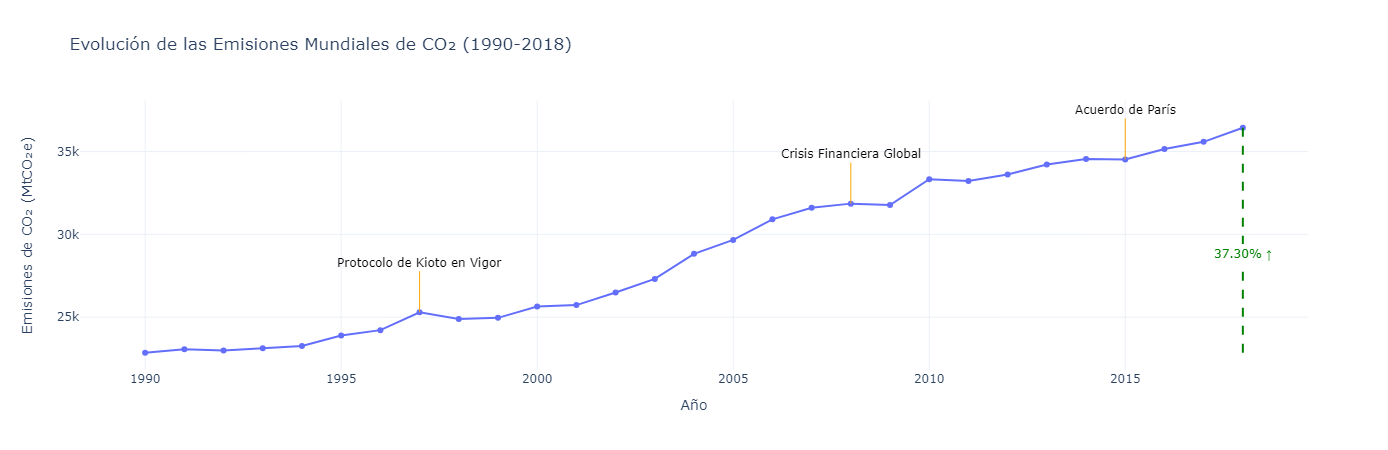

### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Etiquetas y colores claros**: Se utilizaron etiquetas claras y un color verde para la línea de incremento, evitando distracciones visuales.
- **Anotaciones para eventos clave**: Se añadieron hitos como el Protocolo de Kioto, la Crisis Financiera Global y el Acuerdo de París, facilitando la contextualización de los cambios en la serie temporal.
- **Interactividad**: La gráfica es interactiva, permitiendo al usuario explorar datos específicos en los puntos de interés y obtener detalles precisos.

### f) Explicación de Decisiones 💡

La elección de un gráfico de líneas fue motivada por la necesidad de mostrar una tendencia a lo largo del tiempo y facilitar la identificación de patrones y cambios en las emisiones de CO₂. Al incorporar eventos clave mediante anotaciones y un cálculo del incremento porcentual acumulado, los usuarios pueden interpretar mejor el contexto y la magnitud del cambio en las emisiones globales. La adición de un fondo blanco en el texto del incremento ayuda a evitar el traslape visual con la línea de incremento, mejorando la legibilidad de la información.